# COVID-19 Auswertung - new cases, deaths, Intensivstationen
## DIVI und WHO Daten - Deutschland und einige Nachbarn


## import libraries

In [157]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
import numpy as np

# performance
from datetime import datetime
from datetime import date # todays date
import seaborn as sns

import os
now = datetime.now()

# Preprocessing Dataframes

## Datenimport

In [158]:
# Webabruf - CSV einlesen
data = pd.read_csv("https://covid19.who.int/WHO-COVID-19-global-data.csv")

# Lokal - CSV einlesen
#df = pd.read_csv("D:\Github\Covid-19-Auswertung-WHO-DIVI\data-WvhXR.csv")

# Lokal - CSV einlesen
df_divi2 = pd.read_csv("D:\Github\Covid-19-Auswertung-WHO-DIVI\data-k3LbD.csv")
df_divi2['date'] = pd.to_datetime(df_divi2.date, utc=True)
#df_divi2 = df.loc[df.date >= ts, :]

### preprocessing

In [159]:
#gleitender Mittelwert der cases und deaths, 7 Tage
data['MA'] = data['New_cases'].rolling(window=7,min_periods=1).mean()
data['MA_deaths'] = data['New_deaths'].rolling(window=7, min_periods=1).mean()

data['MSTD_cases'] = data['New_cases'].rolling(window=7,min_periods=1).std()
data['MSTD_deaths'] = data['New_deaths'].rolling(window=7,min_periods=1).std()

data['OTG_cases'] = data['MA'] + data['MSTD_cases']
data['UTG_cases'] = data['MA'] - data['MSTD_cases']

data['OTG_deaths'] = data['MA_deaths'] + data['MSTD_deaths']
data['UTG_deaths'] = data['MA_deaths'] - data['MSTD_deaths']

# Date_reported in eine Datumsspalte umwandeln
data['Date_reported'] = pd.to_datetime(data.Date_reported, utc=True)

#df['date'] = pd.to_datetime(df.date, utc=True)
#df = df.loc[df.date >= ts, :]

In [160]:
#Timestamp definieren  YYYY-MM-DD
ts = pd.to_datetime('2020-10-01', utc=True)

#dataframe reduzieren 
###data = data.loc[data.Date_reported >= ts, :]

### Länder definieren

In [161]:
ger = data[data.Country == 'Germany']
kor = data[data.Country == 'Republic of Korea']
# fr = data[data.Country == 'France']
# at = data[data.Country == 'Austria']
# pl = data[data.Country == 'Poland']
# cz = data[data.Country == 'Czechia']
# ch = data[data.Country == 'Switzerland']
# it = data[data.Country == 'Italy']
# es = data[data.Country == 'Spain']
# gb = data[data.Country == 'The United Kingdom']
# se = data[data.Country == 'Sweden']

#euro = data[data.WHO_region == 'EURO']

# Variablen für die Plots definieren

### Linien und Schriftgrößen

In [162]:
# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße
size = 28

### Einwohnerzahlen

In [163]:
# E_fr = 66012908
# E_pl = 38659927
E_ger = 81504947
E_kor = 51640000
# E_cz = 10586651
# E_at = 8902600
# E_ch = 8847020
# E_gb = 66650000

 ### Bezugsgröße Einwohner und Datum

In [164]:
pE = 100000

# Heutiges Datum und formatieren dd.mm.YYYY
today = date.today().strftime("%d.%m.%Y")

### Speicherorte und Dateinamen

In [165]:
pfad = "D:\Github\Covid-19-Auswertung-WHO-DIVI\plots_Korea_Ger"

name_1_1 = "\plot_1-1_cases_absolute numbers.jpg" # cases absoulte zahlen EU
name_1_2 = "\plot_1-2_cases.jpg" # cases pro 100.000 Einwohner EU 
name_2 = "\plot_2_intensiv.jpg" # intensiv Deutschland
name_2_2 = "\plot_2_2_intensiv2.jpg" # intensiv Deutschland
name_3_1 = "\plot_3-1_deaths_absolute numbers.jpg" # deaths absolute zahlen EU
name_3_2 = "\plot_3-2_deaths.jpg" # deaths pro 100.000 Einwohner EU
name_4_1 = "\plot_4-1_cases_ger.jpg" # cases Deutschland
name_4_2 = "\plot_4-2_deaths_ger.jpg" # deaths Deutschland
name_5 = "D:\Github\Covid-19-Auswertung-WHO-DIVI\performance_dist_Führungskreis.jpg" # Performance Plot
name_5_1 = "D:\Github\Covid-19-Auswertung-WHO-DIVI\performance_dist_Korea_ger.jpg" # Performance Plot

# Visualisierung der Plots

### 1-1) Neue Fälle 7 Tage Mittelwert (absolute Zahlen)

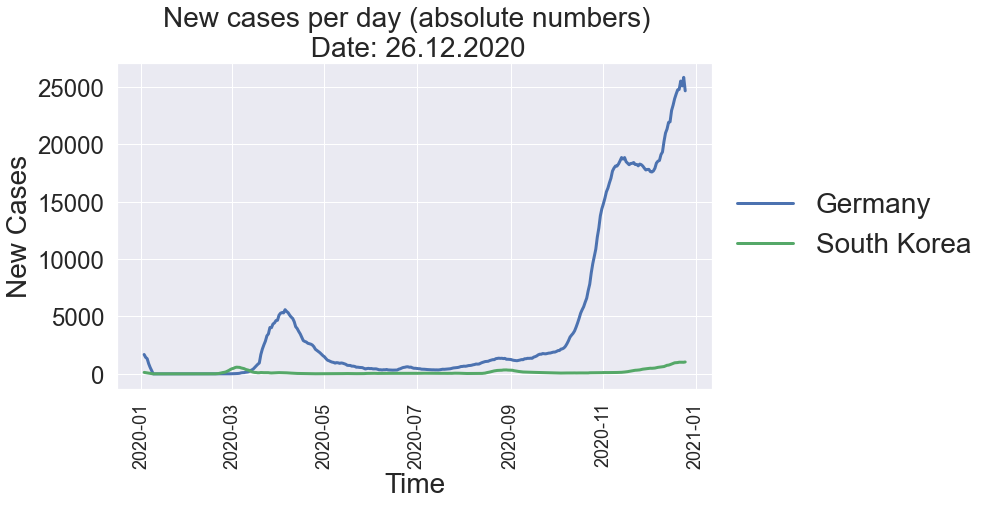

In [166]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 


plt.plot(ger.Date_reported,ger['MA'], 'b-', linewidth = lws, label="Germany")
plt.plot(kor.Date_reported,kor['MA'], 'g-', linewidth = lws, label="South Korea")

plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('New Cases', fontsize=size)
plt.title('New cases per day (absolute numbers)  \n Date: ' + today, fontsize=size)
plt.xlabel('Time', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(pfad + name_1_1, dpi = 150, bbox_inches='tight')
#plt.close()

### 1-2) Neue Fälle 7 Tage Mittelwert (pro 100.000 Einwohner)

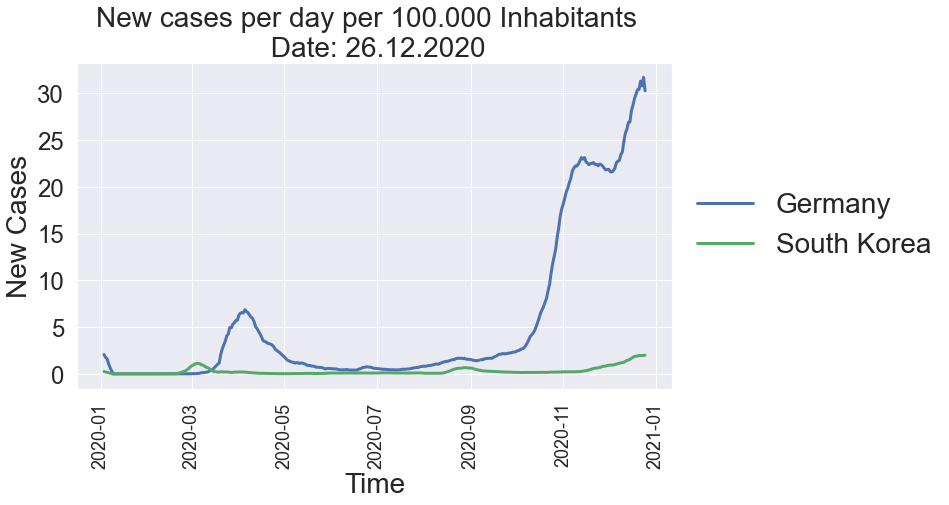

In [167]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))


# Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 

plt.plot(ger.Date_reported,ger['MA']* (pE/E_ger), 'b-', linewidth = lws, label="Germany")
plt.plot(kor.Date_reported,kor['MA']* (pE/E_kor), 'g-', linewidth = lws, label="South Korea")



plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)


# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation=90)
plt.yticks(fontsize=size -4)

plt.ylabel('New Cases', fontsize=size)
plt.title('New cases per day per 100.000 Inhabitants  \n Date: ' + today, fontsize=size)
plt.xlabel('Time', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(pfad + name_1_2, dpi = 150, bbox_inches='tight')
# plt.close()

### 2) Intensivstationen DIVI

In [168]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(16/1.5,9/1.5))

# plt.style.use('seaborn')
# plt.grid(True)
# plt.plot(df.date,df['COVID-19-Fälle'], 'b-', linewidth = lwb, label = "Intensiv-\nstationen \nDeutschland")
# plt.legend(loc='center left', 
#            bbox_to_anchor=(1, 0.5),
#            fancybox=True, 
#            shadow=True, 
#            ncol=1, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 90)
# plt.yticks(fontsize=size -4)

# # plt.xticks([])
# plt.ylabel('Anzahl Personen', fontsize=size)
# plt.title('DIVI-Intensivregister (www.intensivregister.de)  \n Stand: ' + today, fontsize=size)
# plt.xlabel('Zeit', fontsize=size)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(pfad + name_2, dpi = 150, bbox_inches='tight')
# plt.close()

### 2-2) Intensivstationen DIVI2

In [169]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(16/1.5,9/1.5))

# plt.style.use('seaborn')
# plt.grid(True)
# plt.plot(df_divi2.date,df_divi2['Belegte Betten'], color = 'blue', linewidth = lws, label = "occupied beds")
# plt.plot(df_divi2.date,df_divi2['COVID-19-Fälle'], color = 'red', linewidth = lws, label = "COVID-19 Cases")


# plt.legend(loc='center left', 
#            bbox_to_anchor=(1, 0.5),
#            fancybox=True, 
#            shadow=True, 
#            ncol=1, 
#            fontsize=size)




# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 90)
# plt.yticks(fontsize=size -4)

# # plt.xticks([])
# plt.ylabel('Number of People', fontsize=size)
# plt.title('Germany - "DIVI-Intensivregister (www.intensivregister.de)"  \n Date: ' + today, fontsize=size)
# plt.xlabel('Time', fontsize=size)

# # fill area between 
# plt.fill_between(df_divi2.date, df_divi2['COVID-19-Fälle'], color='red',alpha=0.5)
# plt.fill_between(df_divi2.date, df_divi2['COVID-19-Fälle'], df_divi2['Belegte Betten'], color='blue',alpha=0.5)


# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(pfad + name_2_2, dpi = 150, bbox_inches='tight')
# plt.show()
# #plt.close()

###  3-1) Todesfälle 7 Tage Mittelwert (absolute Zahlen) 

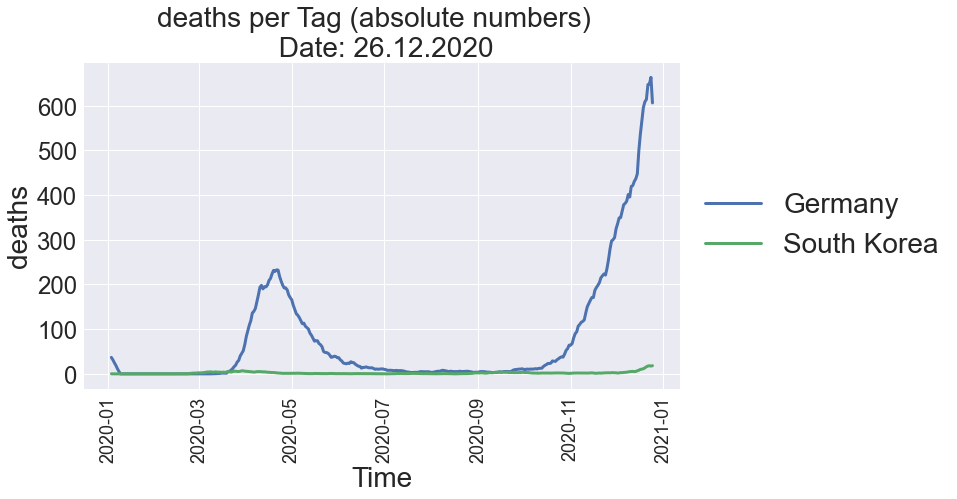

In [170]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020
plt.plot(ger.Date_reported,ger['MA_deaths'], 'b-', linewidth = lws, label = "Germany") # blau, linie, dick
plt.plot(kor.Date_reported,kor['MA_deaths'], 'g-', linewidth = lws, label = "South Korea") # blau, linie, dick


# Legende 
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('deaths', fontsize=size)
plt.title('deaths per Tag (absolute numbers)  \n Date: ' + today, fontsize=size)
plt.xlabel('Time', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(pfad + name_3_1, dpi = 150, bbox_inches='tight')
# plt.close()

###  3-2) Todesfälle 7 Tage Mittelwert (pro 100.000 Einwohner) 

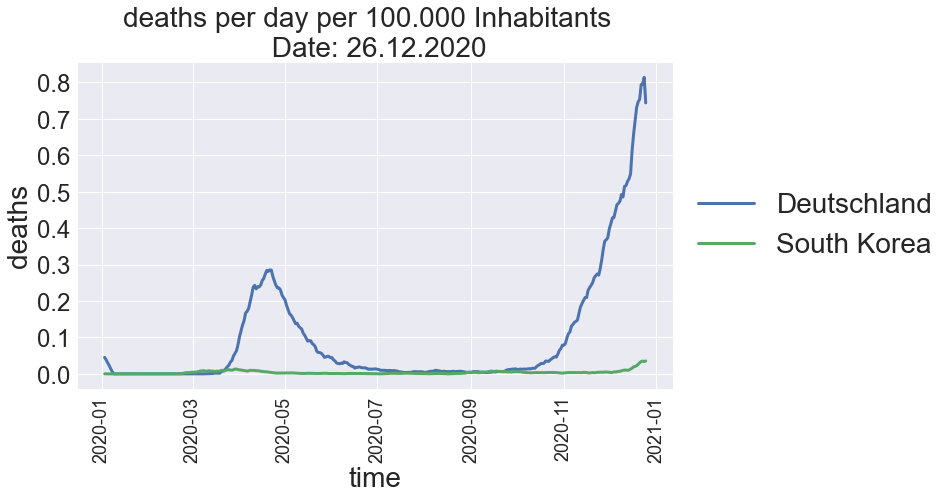

In [171]:
# Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
plt.figure(figsize=(16/1.5,9/1.5))

plt.style.use('seaborn')
plt.grid(True)

# Todesfälle pro 100.000 Einwohner 02.12.2020
plt.plot(ger.Date_reported,ger['MA_deaths'] * (pE/E_ger), 'b-', linewidth = lws, label = "Deutschland") # blau, linie, dick
plt.plot(kor.Date_reported,kor['MA_deaths'] * (pE/E_kor), 'g-', linewidth = lws, label = "South Korea") # blau, linie, dick


# Legende 
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fancybox=True, 
           shadow=True, 
           ncol=1, 
           fontsize=size)

# Schriftgrößen x und y achsenwerte
plt.xticks(fontsize=size - 10, rotation = 90)
plt.yticks(fontsize=size -4)
plt.ylabel('deaths', fontsize=size)
plt.title('deaths per day per 100.000 Inhabitants  \n Date: ' + today, fontsize=size)
plt.xlabel('time', fontsize=size)

# Diagramm als Bild exporieren und Auflösung definieren
plt.savefig(pfad + name_3_2, dpi = 150, bbox_inches='tight')
#plt.close()

###  4-1) Cases 7 Tage Mittelwert Deutschland

In [172]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(16/1.5,9/1.5))

# # Neue Fälle pro Tag pro 100.000 Einwohner - 02.12.2020 
# plt.plot(ger.Date_reported,ger['MA'], 'b-', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)")
# plt.plot(ger.Date_reported,ger['New_cases'], '.')
# plt.plot(ger.Date_reported,ger['OTG_cases'], 'r--', linewidth = lws, label ="+1 sigma")
# plt.plot(ger.Date_reported,ger['UTG_cases'], 'r--', linewidth = lws, label ="-1 sigma")

# plt.legend(loc='center left', 
#            bbox_to_anchor=(1, 0.5),
#            fancybox=True, 
#            shadow=True, 
#            ncol=1, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 90)
# plt.yticks(fontsize=size -4)

# plt.ylabel('Neue Fälle', fontsize=size)
# plt.title('Neue Fälle pro Tag \n Stand: ' + today, fontsize=size)
# plt.xlabel('Zeit', fontsize=size)

# # fill area between lines
# plt.fill_between(ger.Date_reported, ger['OTG_cases'], ger['UTG_cases'] , color='red',alpha=0.5)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(pfad + name_4_1, dpi = 150, bbox_inches='tight')
# # plt.close()

###  4-2) Deaths 7 Tage Mittelwert Deutschland

In [173]:
# # Größe im 16:9 format und mit Umrechnungsfaktor 1.2 (durch Test ermittelt) für PowerPoint angepasst
# plt.figure(figsize=(16/1.5,9/1.5))

# plt.style.use('seaborn')
# plt.grid(True)

# # Todesfälle pro 100.000 Einwohner 02.12.2020

# plt.plot(ger.Date_reported,ger['MA_deaths'], 'b-', linewidth = lwb, label = "Deutschland\n(7-Tage Mittel)") # blau, linie, dick
# plt.plot(ger.Date_reported,ger['New_deaths'], '.')

# plt.plot(ger.Date_reported,ger['OTG_deaths'], 'r--', linewidth = lws, label ="+1 sigma")
# plt.plot(ger.Date_reported,ger['UTG_deaths'], 'r--', linewidth = lws, label ="-1 sigma")

# # Legende 
# plt.legend(loc='center left', 
#            bbox_to_anchor=(1, 0.5),
#            fancybox=True, 
#            shadow=True, 
#            ncol=1, 
#            fontsize=size)

# # Schriftgrößen x und y achsenwerte
# plt.xticks(fontsize=size - 10, rotation = 90)
# plt.yticks(fontsize=size -4)
# plt.ylabel('Todesfälle', fontsize=size)
# plt.title('Todesfälle pro Tag - Deutschland  \n Stand: ' + today, fontsize=size)
# plt.xlabel('Zeit', fontsize=size)

# # fill area between lines
# plt.fill_between(ger.Date_reported, ger['OTG_deaths'], ger['UTG_deaths'] , color='red',alpha=0.5)

# # Diagramm als Bild exporieren und Auflösung definieren
# plt.savefig(pfad + name_4_2, dpi = 150, bbox_inches='tight')
# plt.close()

## Performance messen

In [174]:
# performance
# pc = os.environ['COMPUTERNAME']
# now2 = datetime.now()
# print(f'performance {pc} = {now2-now} seconds')

In [175]:
# Performance
pc = os.environ['COMPUTERNAME']
now2 = datetime.now()

x = now2 - now
x = round(x.total_seconds(),2)

print(f'performance {pc} = {x} seconds')

performance DOUG = 2.84 seconds


In [176]:
# Performance CSV einlesen
d = pd.read_csv('df_performance_Korea_Ger.csv')

In [177]:
# Neues Dateframe für die Performance definieren
now = datetime.now()

d2 = {'Date': [now],
      'PC': [pc],
      'Laufzeit_in_s': [x]}
#d2

In [178]:
# Datum Spalte formatieren
df2 = pd.DataFrame(d2)
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d %r')

In [179]:
# Performance mit dem CSV verbinden
d = d.append(df2, ignore_index=True)
#d.head(3)

In [180]:
# Datenexport Performance
d.to_csv(r'D:\Github\Covid-19-Auswertung-WHO-DIVI\df_performance_Korea_Ger.csv', index=False)

In [181]:
# Plot Performance
sns.set(rc={'figure.figsize':(16,9)})
sns_plot = sns.distplot(d['Laufzeit_in_s'],
            kde=True,
            rug=True,
            )
sns_plot.set_title('Performance plots Korea_ger',size=size)
sns_plot.set_ylabel('Wahrscheinlichkeit', size = size -5)
sns_plot.set_xlabel('Laufzeit [s]', size = size -5)
fig = sns_plot.get_figure()
fig.savefig(name_5_1) 
plt.close()